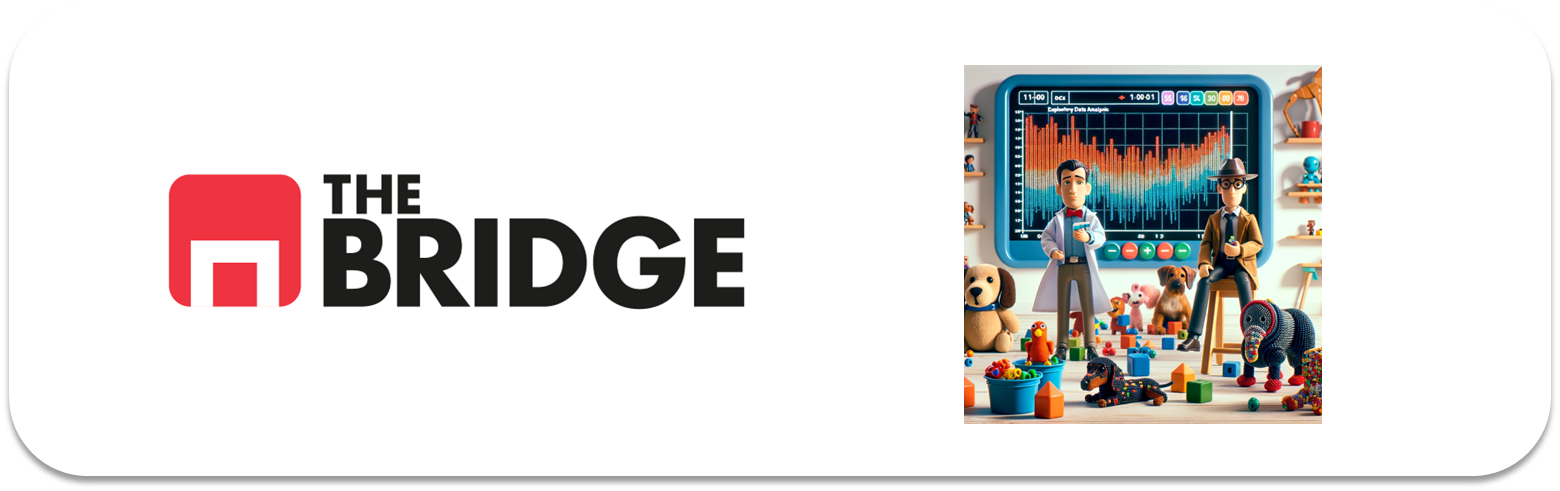

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [62]:
#Importamos librerias y módulos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas,  plot_grouped_histograms, plot_grouped_boxplots

## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df_titanic=sns.load_dataset("titanic")

In [ ]:
df=df.copy()

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [ ]:
#Eliminamos las columnas con drop:
df=df.drop(columns=["deck", "survived", "pclass", "embarked"])


,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,familiy_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0
5,male,NaN,0,0,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54.0,0,0,51.8625,First,man,True,Southampton,no,True,0
7,male,2.0,3,1,21.0750,Third,child,False,Southampton,no,False,4
8,female,27.0,0,2,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14.0,1,0,30.0708,Second,child,False,Cherbourg,yes,False,1


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [8]:
df["familiy_members"]=df["parch"]+df["sibsp"]

In [11]:
df.head(10)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,familiy_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0
5,male,NaN,0,0,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54.0,0,0,51.8625,First,man,True,Southampton,no,True,0
7,male,2.0,3,1,21.0750,Third,child,False,Southampton,no,False,4
8,female,27.0,0,2,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14.0,1,0,30.0708,Second,child,False,Cherbourg,yes,False,1


In [12]:
df=df.drop(columns=["sibsp", "parch"])

In [13]:
df.head(10)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,familiy_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
5,male,NaN,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54.0,51.8625,First,man,True,Southampton,no,True,0
7,male,2.0,21.0750,Third,child,False,Southampton,no,False,4
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14.0,30.0708,Second,child,False,Cherbourg,yes,False,1


In [27]:
df.isna().mean()*100

sex                0.0
age                0.0
fare               0.0
class              0.0
who                0.0
adult_male         0.0
embark_town        0.0
alive              0.0
alone              0.0
familiy_members    0.0
age_imputed        0.0
dtype: float64

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [22]:
#Imputamos la moda a los valores nulos de embark_town
embark_town_moda=df["embark_town"].mode()[0]
embark_town_moda
df.loc[df["embark_town"].isna(), "embark_town"]=embark_town_moda

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [ ]:
#Creamos una columna de imputación
df["age_imputed"]=df.age.isna()

In [26]:
# Imputo el valor por who en age:
# Máscaras por género
is_woman = df.who == "woman"
is_child = df.who == "child"
is_man = df.who == "man"
# Valores medianos
mediana_woman = df.loc[is_woman,"age"].median()
mediana_child = df.loc[is_child,"age"].median() # No hay chiquillos nulos, pero por si acaso...
mediana_man = df.loc[is_man,"age"].median()
# Imputamos
df.loc[is_woman & df["age_imputed"], "age"] = mediana_woman
df.loc[is_child & df["age_imputed"], "age"] = mediana_child
df.loc[is_man & df["age_imputed"], "age"] = mediana_man

### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

#### 1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

* En términos absolutos, sobrevivieron más mujeres que hombres y más hombres que niños. En cambio, en terminos relativos sobrevivieron más mujeres que niños (76 vs. 59%); y más niños que hombres (59 vs. 16%).
* Dado el bajo valor de p-value, se puede concluir que hay una relación estadísticamente significativa entre el sexo y la superviviencia.
* Dado el bajo valor de p-value, se puede concluir que hay una relación estadísticamente significativa entre niños y la superviviencia. En este caso, hay menos dependencia (p-value más alto)

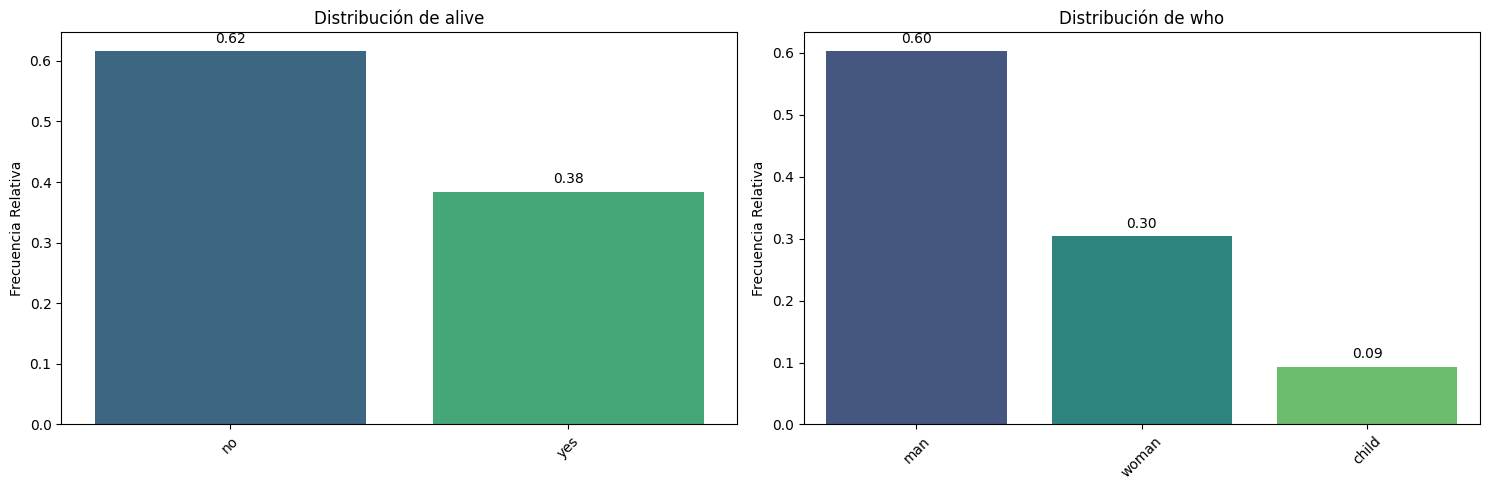

In [28]:
#Punto 1
#Pintamos gráfica de barras de mujeres hombre y niños
pinta_distribucion_categoricas(df, ["alive", "who"], relativa=True, mostrar_valores=True)

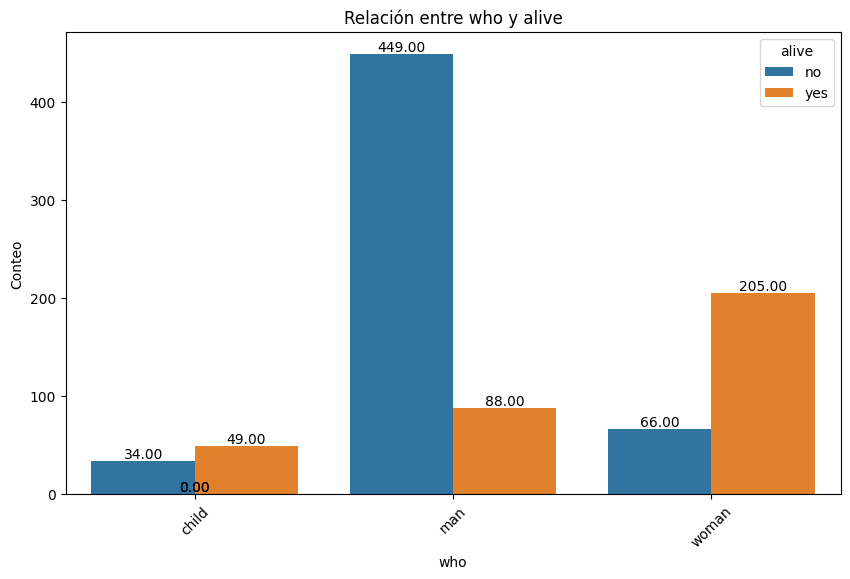

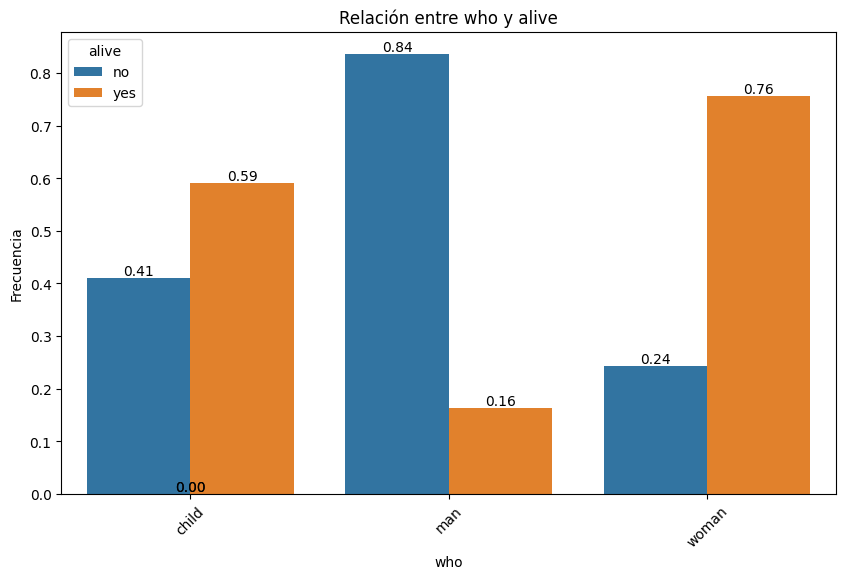

In [33]:
#Hacemos la comparación utilizando "alive" como variable directora
plot_categorical_relationship_fin(df, "who","alive", relative_freq=False, show_values= True)
plot_categorical_relationship_fin(df, "who","alive", relative_freq=True, show_values= True)

In [36]:
#calculamos la correlación entre "who" y "alive"
#Primero sacamos la tabla de contingencia (las frecuencias de aparición de la combinación de valores)
tabla_contingencia = pd.crosstab(df['alive'], df['who'])
tabla_contingencia

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [45]:
tabla_contingencia[["child", "man"]]
tabla_contingencia["adulto"]=tabla_contingencia["woman"]+tabla_contingencia["man"]
tabla_contingencia

who,child,man,woman,adulto
alive,,,,
no,34,449,66,515
yes,49,88,205,293


In [ ]:
#Después aplicamos la prueba de Chi-Cuadrado (alive-sexo)
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia[["man", "woman"]])


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 271.0825229571168
P-Value: 6.5914325092603e-61
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[342.2710396 172.7289604]
 [194.7289604  98.2710396]]


In [46]:
#Después aplicamos la prueba de Chi-Cuadrado (niño-adulto)
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia[["child", "adulto"]])


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 15.556993340077092
P-Value: 8.005497211300105e-05
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 497.85858586]
 [ 31.85858586 310.14141414]]


#### 2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

* En térmicos absolutos y relativos sobrevivieron más pasajeros de primera clase. En terminos absolutos, sobrevivieron más de tercera que de segunda (119 vs. 87), pero, en términos relativos, sobrevivieron más pasajeros de segunda (47 vs 24%).
* Hay relación estadisticamente significativa entre clase y supervivencia.

c:\Users\aquin\Desktop\Bootcamp_DS\DS-Online_AQR\03_Data_Analysis\Sprint_07\Unidad_02_Estadistica_Descriptiva_Multivariante\03_Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


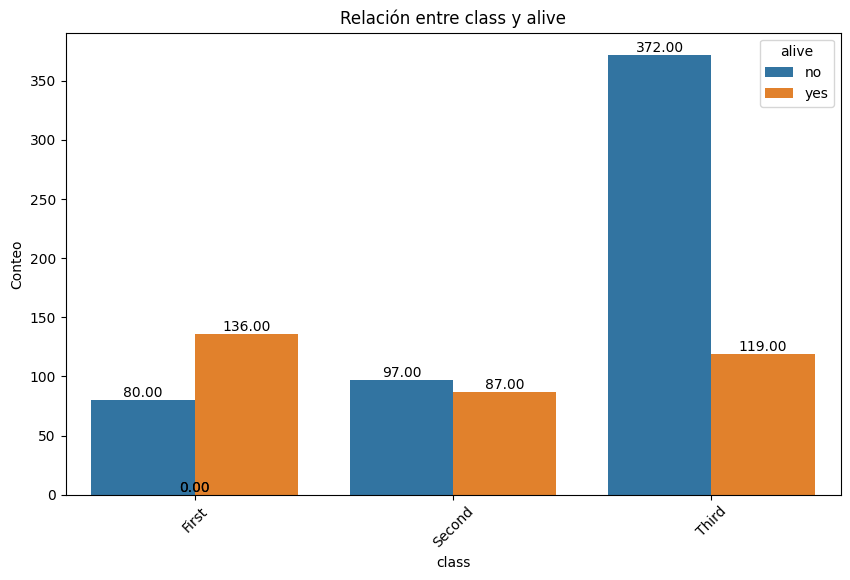

c:\Users\aquin\Desktop\Bootcamp_DS\DS-Online_AQR\03_Data_Analysis\Sprint_07\Unidad_02_Estadistica_Descriptiva_Multivariante\03_Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


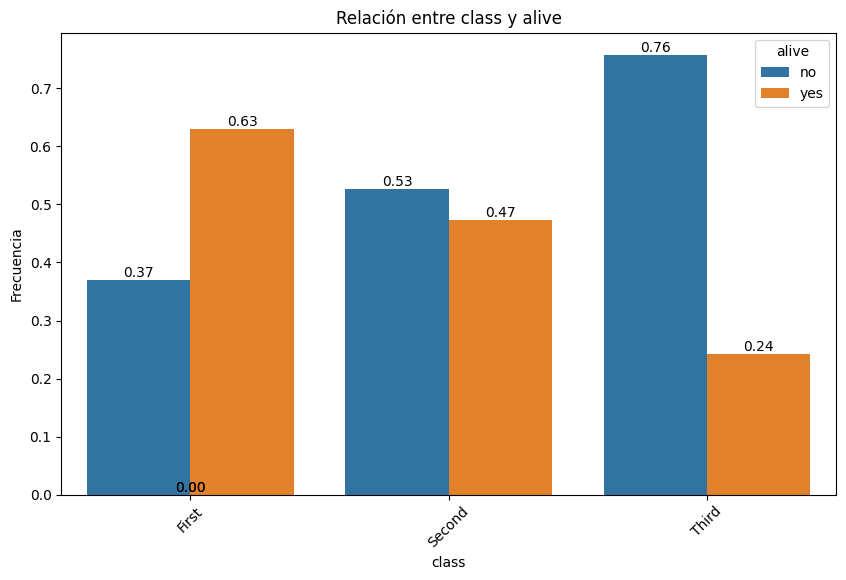

In [49]:
#Punto 2: clase y supervivencia
plot_categorical_relationship_fin(df, "class","alive", relative_freq = False, show_values = True)
plot_categorical_relationship_fin(df, "class","alive", relative_freq = True, show_values = True)

In [50]:
#calculamos la correlación entre "class" y "alive"
#Primero sacamos la tabla de contingencia (las frecuencias de aparición de la combinación de valores)
tabla_contingencia_2 = pd.crosstab(df['alive'], df['class'])
tabla_contingencia_2

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


In [51]:
#Después aplicamos la prueba de Chi-Cuadrado (alive-clase)
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_2)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


#### 3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?
* Sobrevieron más pasajeros de Southampton.
* Parece que hay relación estadísticamene significativa al comparar las tres ciudades--> Cherbourg destaca.
* No hay relación stadísticamene significativa al comparar la supervivencia de los pasajeros que embarcaron en Queenstown o Southampton.

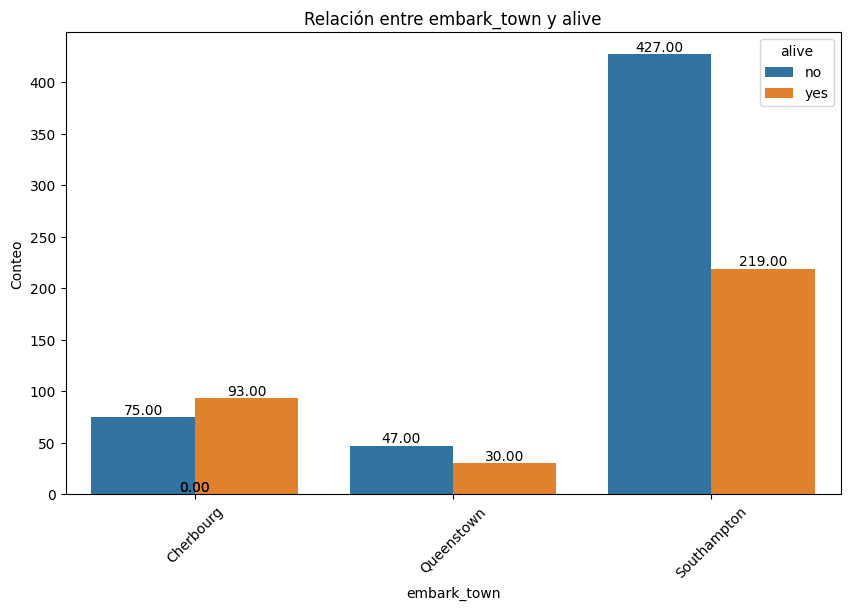

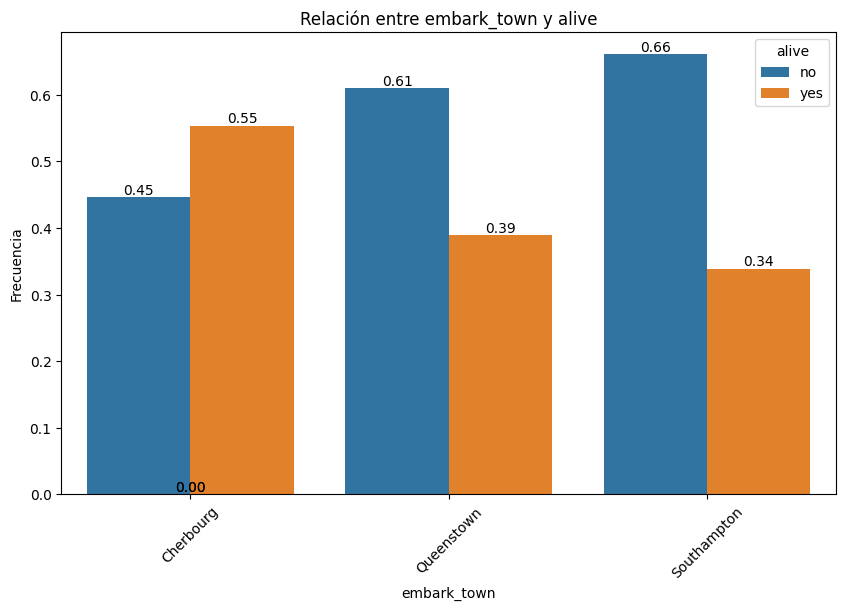

In [53]:
#Punto 3: superviviencia y ciudad de embarque
plot_categorical_relationship_fin(df, "embark_town","alive", relative_freq = False, show_values = True)
plot_categorical_relationship_fin(df, "embark_town","alive", relative_freq = True, show_values = True)

In [54]:
#calculamos la correlación entre "class" y "alive"
#Primero sacamos la tabla de contingencia (las frecuencias de aparición de la combinación de valores)
tabla_contingencia_3 = pd.crosstab(df['alive'], df['embark_town'])
tabla_contingencia_3

embark_town,Cherbourg,Queenstown,Southampton
alive,,,
no,75,47,427
yes,93,30,219


In [56]:
#Después aplicamos la prueba de Chi-Cuadrado (alive-clase)
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_3[["Queenstown", "Southampton"]])


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 0.5721809833080619
P-Value: 0.4493935510092518
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[ 50.4813278 423.5186722]
 [ 26.5186722 222.4813278]]


#### 4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?
* Valore de p muy bajo ---> Claramente, hay relación entre precio del pasaje y supervivencia: a mayor precio de pasaje, mayor superviviencia.

In [61]:
df.columns

Index(['sex', 'age', 'fare', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone', 'familiy_members', 'age_imputed'],
      dtype='object')

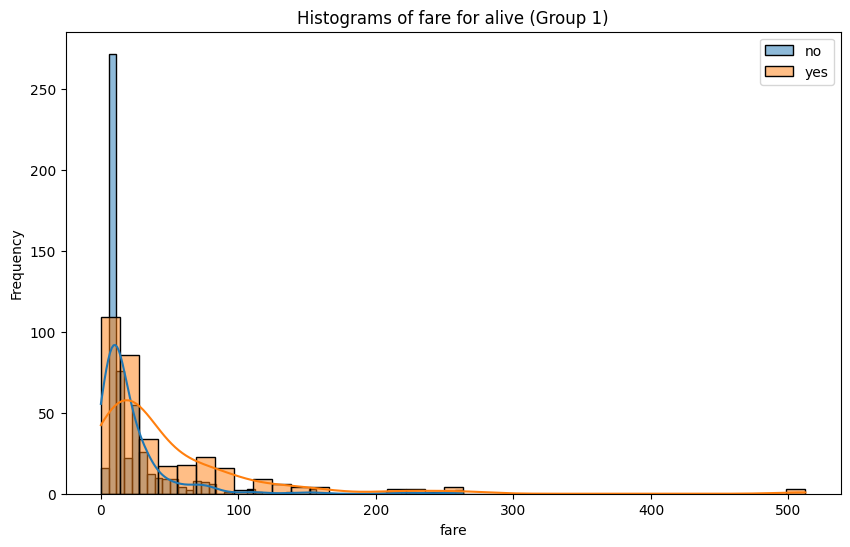

In [ ]:
#Punto 4: alive y fare

plot_grouped_histograms(df, cat_col="alive",num_col="fare", group_size= 2)

In [66]:
#Para definir relación, aplicamos la prueba de U de Mann-Whitney
from scipy.stats import mannwhitneyu

In [64]:
#Separamos los datos en 2 grupos según la variable categórica (alive):
grupo_a = df.loc[df.alive == "no"]["fare"]
grupo_b = df.loc[df.alive == "yes"]["fare"]

In [67]:
#Aplicamos la prueba y mostramos resultados
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 57806.5
Valor p: 4.553477179250237e-22


#### 5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [ ]:
#Punto 5:
#Cosnultamos los tipode de pasajeros que no pagaron billetes:
#Todos hombres y viajaban solos. Probablemente colaron en el barco
print(df.loc[df.fare == 0, "who"].count())
df.loc[df.fare == 0]

15


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,familiy_members,age_imputed
179,male,36.0,0.0,Third,man,True,Southampton,no,True,0,False
263,male,40.0,0.0,First,man,True,Southampton,no,True,0,False
271,male,25.0,0.0,Third,man,True,Southampton,yes,True,0,False
277,male,30.0,0.0,Second,man,True,Southampton,no,True,0,True
302,male,19.0,0.0,Third,man,True,Southampton,no,True,0,False
413,male,30.0,0.0,Second,man,True,Southampton,no,True,0,True
466,male,30.0,0.0,Second,man,True,Southampton,no,True,0,True
481,male,30.0,0.0,Second,man,True,Southampton,no,True,0,True
597,male,49.0,0.0,Third,man,True,Southampton,no,True,0,False
633,male,30.0,0.0,First,man,True,Southampton,no,True,0,True


In [ ]:
#Precio billete más caro:
pasaje_carisimo=df.fare.max()

df.loc[df.fare == pasaje_carisimo] #· personas pagaron un precio desorbitado

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,familiy_members,age_imputed
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0,False
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1,False
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0,False


In [75]:
pasaje_carisimo

np.float64(512.3292)

#### 6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.
* En general, los pasajeros de Cherbourg son los que más pagaron en promedio por pasaje y por lo tanto, los que tuvieron mayor supervivencia.

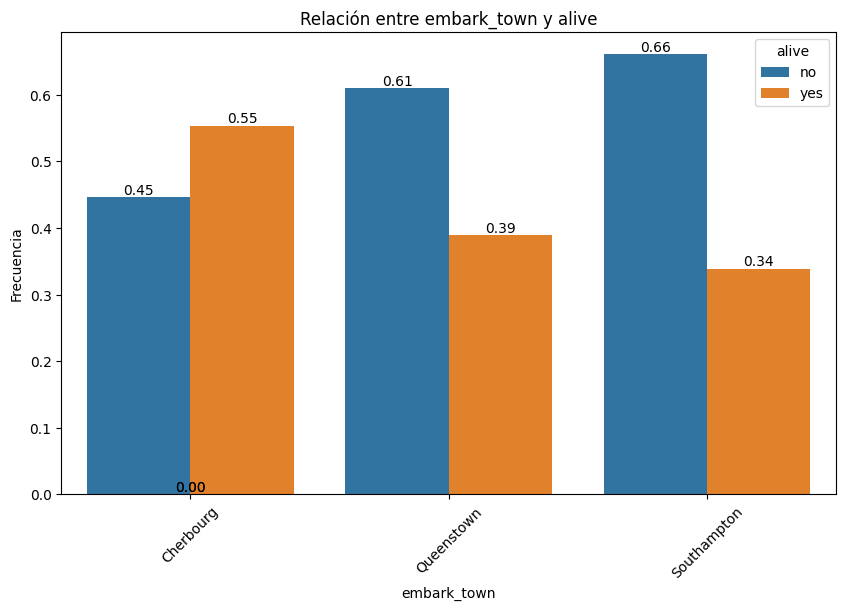

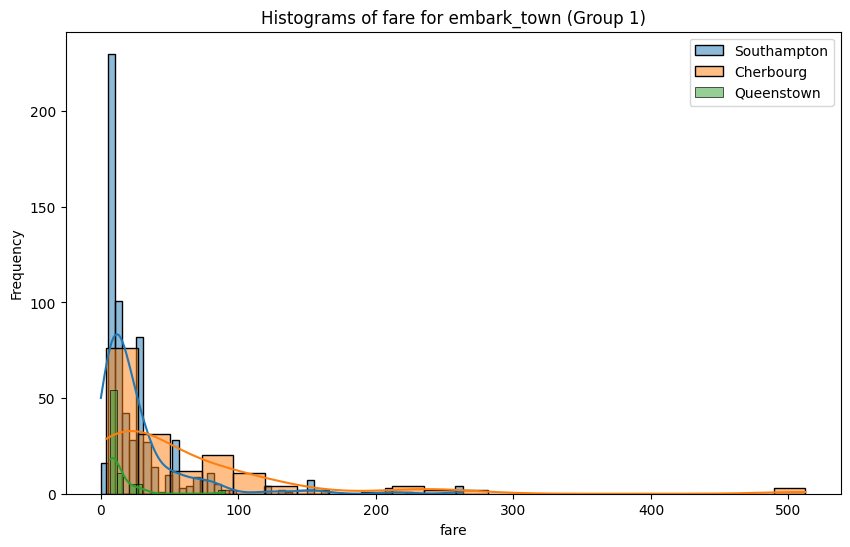

In [ ]:
#Punto 6: relación entre alive-embark_town(categórica)-fare(numérica)
#Escogemos alive como directora.
#Mostramos gráficas bivariantes:
plot_categorical_relationship_fin(df,"embark_town","alive", relative_freq= True, show_values= True)
plot_grouped_histograms(df, cat_col="embark_town",num_col="fare", group_size= 3)


#### 7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [ ]:
#Punto 7: relación entre alive-clase(categórica)-edad(numérica)

c:\Users\aquin\Desktop\Bootcamp_DS\DS-Online_AQR\03_Data_Analysis\Sprint_07\Unidad_02_Estadistica_Descriptiva_Multivariante\03_Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


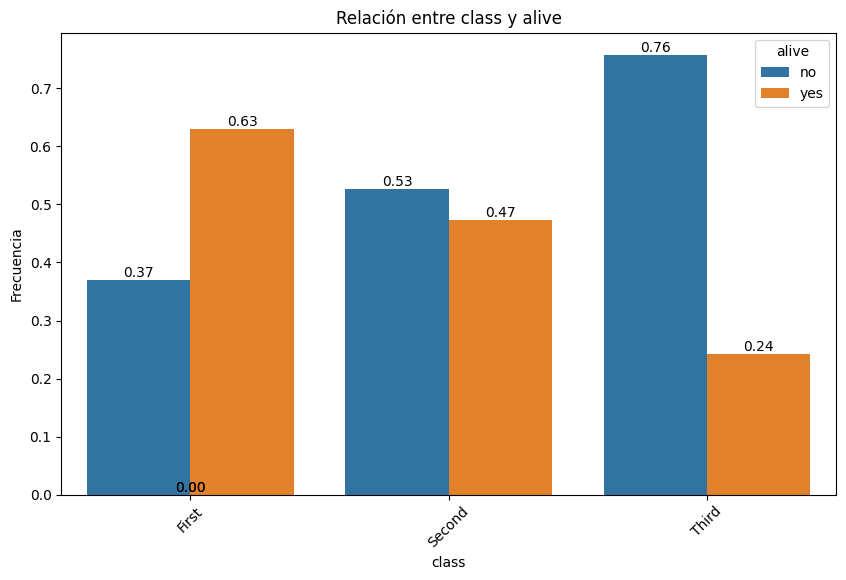

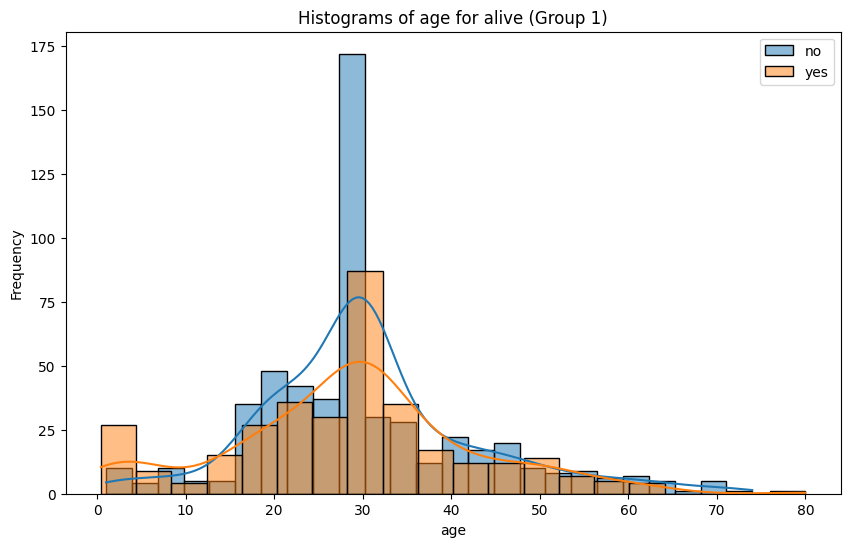

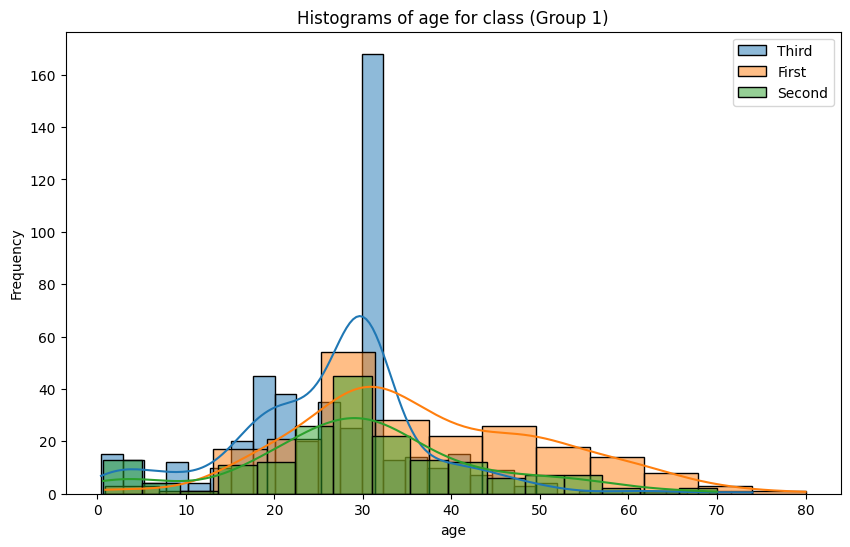

In [86]:
plot_categorical_relationship_fin(df,"class","alive", relative_freq= True, show_values= True)
plot_grouped_histograms(df, cat_col="alive",num_col="age", group_size= 3)
plot_grouped_histograms(df, cat_col="class",num_col="age", group_size= 3)

In [87]:
col_directora = "alive"
col_1 = "class"
col_2 = "age"
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta no:


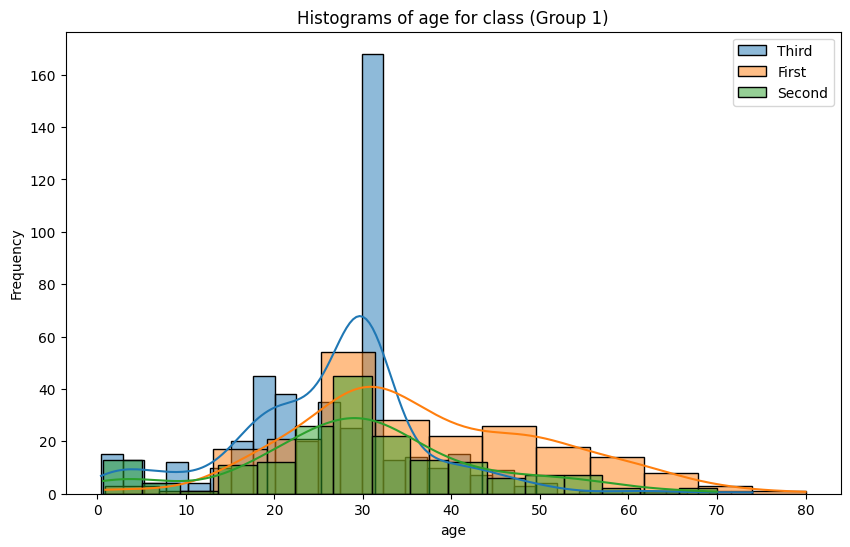

Respuesta yes:


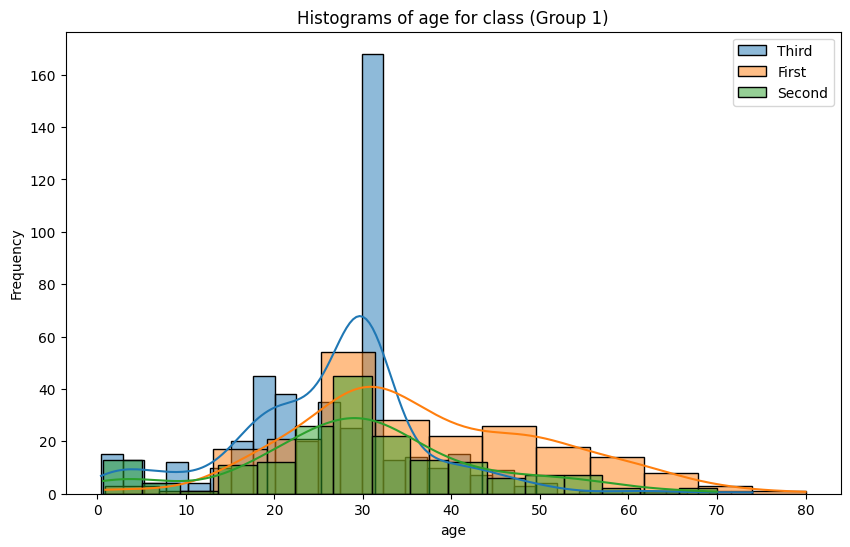

In [91]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_grouped_histograms(df, cat_col=col_1,num_col=col_2, group_size= 3)

In [88]:
diccionario_multivariante

{'no':       age   class
 0    22.0   Third
 4    35.0   Third
 5    30.0   Third
 6    54.0   First
 7     2.0   Third
 ..    ...     ...
 884  25.0   Third
 885  39.0   Third
 886  27.0  Second
 888  30.0   Third
 890  32.0   Third
 
 [549 rows x 2 columns],
 'yes':       age   class
 1    38.0   First
 2    26.0   Third
 3    35.0   First
 8    27.0   Third
 9    14.0  Second
 ..    ...     ...
 875  15.0   Third
 879  56.0   First
 880  25.0  Second
 887  19.0   First
 889  26.0   First
 
 [342 rows x 2 columns]}

#### 8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?